In [1]:
# Import all modules.

import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
# Define all values to be used.

plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.titlepad'] = 10
plt.rcParams.update({'font.size': 16})

# Code to make plots white:
# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.labelcolor" : "w",
#           "axes.edgecolor" : "w"}
# plt.rcParams.update(params)

# Constants:
Delta = 0  # Detuning
Gamma = 1  # Decay rate
Omega = 10 * Gamma  # Rabi frequency
n = 1000  # Number of time steps
N = 1000  # Number of runs

# System state:
a = 0
b = 1
psi = np.array([a, b])  # Qubit state
psi_0 = np.array([1, 0])  # Ground state
psi_1 = np.array([0, 1])  # Excited state
psi_evol = np.zeros((n + 1, 2))  # Array of qubit's evolution for n time steps

# Time steps:
dt = 0.01 * Gamma
t = np.zeros(n + 1)  # Array of timestamps to loop over
for i in range(1, n + 1):
    t[i] = i * dt

# Matrices:
I = np.array([[1, 0], [0, 1]])  # Identity matrix
H = 0.5 * np.array([[Delta, Omega], [Omega, -Delta]])  # Hamiltonian (Hermitian)
H_eff = H - np.array([[0, 0], [0, 1j*Gamma]])  # Effective Hamiltonian (non-Hermitian)
H_tot = I - 1j * H_eff * dt  # Combined Hamiltonian to be used in MCW

In [3]:
# Define all methods and functions.

# Solve OBEs:
def solve(t):
    # Split into five terms (A-E) for simplicity.
    A = Omega ** 2 / (2 * Omega ** 2 + Gamma ** 2)
    B = np.exp(-(3 * Gamma * t) / 4)
    C = np.cos(np.sqrt(Omega ** 2 - (Gamma ** 2) / 16) * t)
    D = 3 * Gamma / np.sqrt(16 * Omega ** 2 - Gamma ** 2)
    E = np.sin(np.sqrt(Omega ** 2 - (Gamma ** 2) / 16) * t)
    return A * (1 - B * (C + D * E))

# Renormalise wavefunction:
def renorm(psi, mag_sq):  # Parameters: the wavefunction and SQUARED magnitude
    return psi / np.sqrt(mag_sq)

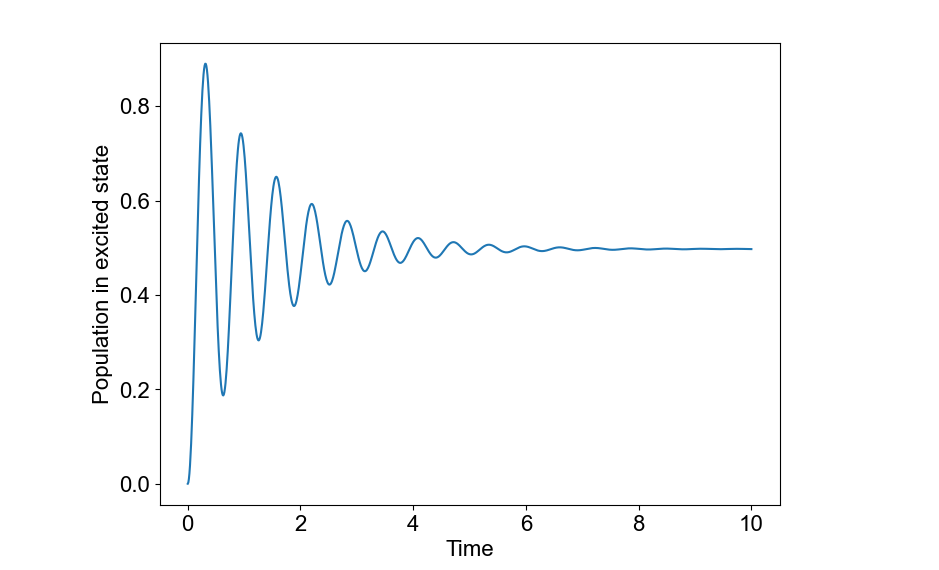

In [4]:
# Analytic solution to OBEs.

# Create empty arrays:
arr = np.empty(n+1)

# Solve equations and plot solution n times:
for i in range(n+1):
    arr[i] = solve(t[i])

plt.figure(figsize=(8, 6))    
plt.plot(t, arr)
plt.title('Quantum Trajectory of Qubit from Analytic Solution of Optical Bloch Equations', color="w")
plt.xlabel('Time')
plt.ylabel('Population in excited state')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.savefig("Analytic.png", transparent=True)
plt.show()

In [5]:
# Simulation of MCW using a small time step.

P = np.empty((N, n + 1))

for i in range(N):
    
    test = psi_0
    b_pop = [0]
    
    for j in range(n):

        test = np.matmul(H_tot, test)
        mag = abs(test[0] ** 2) + abs(test[1] ** 2)
        r = random.random()

        if r > mag:
            test = np.array([1, 0])
        else:
            # Implement additional term before normalsing (see Eq.(20) in Molmer).
            term_0 = 0.5 * Gamma * dt * test[1] ** 2
            term_1 = 0.5 * Gamma * dt * test[0] ** 2
            
            if j < 4:
                print
            
            test[0] = test[0] * (1 + term_0)
            test[1] = test[1] * (1 - term_1)
            test = test / np.sqrt(mag)
        
        b_pop += [abs(test[1]) ** 2]
        
    P[i] = b_pop
    
P = P.mean(axis=0)

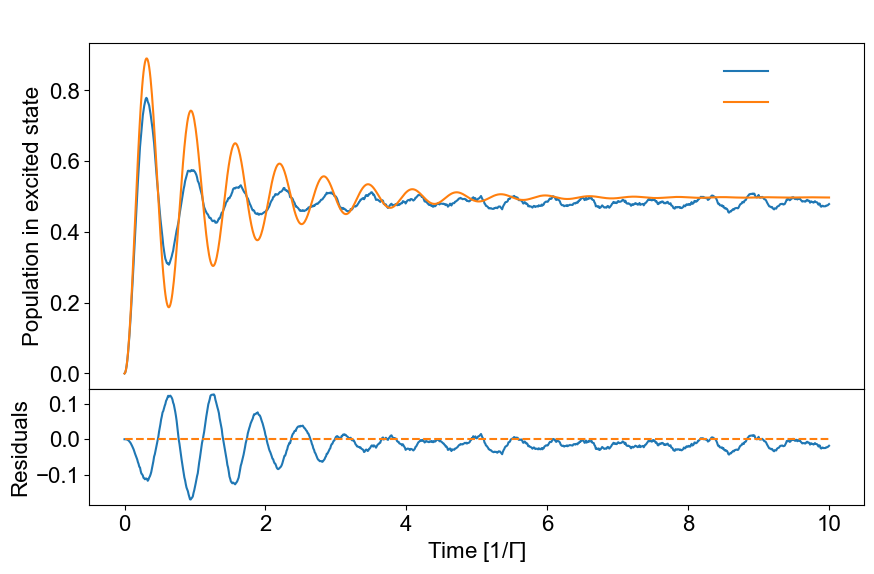

In [6]:
# Plot to compare MCW with OBEs:

residuals = np.zeros(n+1)
for i in range(n+1):
    residuals[i] = P[i] - arr[i]

# Generate figure:
plt.figure(figsize=(10, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

# Plot quantum trajectory (ax0) and residuals (ax1):
ax0.plot(t, P, label='MCW')
ax0.plot(t, arr, label='OBEs')
ax1.plot(t, residuals)
ax1.plot([0, 10], [0, 0], linestyle='--')

ax0.set_title('Quantum Trajectory of Qubit for N = 1000 Atoms', color="w")
ax0.set_ylabel('Population in excited state')
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Time [1/{}]'.format(r'$\Gamma$'))

ax0.legend(labelcolor="w", framealpha=0)

plt.savefig('Comparison.png', transparent=True)
plt.show()

In [7]:
# Test case:

Delta = 0
Gamma = 1
Omega = 0

P = np.empty((N, n + 1))

for i in range(N):
    
    test = psi_1  # Start in excited state
    b_pop = [1]
    
    for j in range(n):

        test = np.matmul(H_tot, test)
        mag = abs(test[0] ** 2) + abs(test[1] ** 2)
        r = random.random()

        if r > mag:
            test = np.array([1, 0])
        else:
            # Implement additional term before normalsing (see Eq.(20) in Molmer).
            term_0 = 0.5 * Gamma * dt * test[1] ** 2
            term_1 = 0.5 * Gamma * dt * test[0] ** 2
            
            test[0] = test[0] * (1 + term_0)
            test[1] = test[1] * (1 - term_1)
            test = test / np.sqrt(mag)
        
        b_pop += [abs(test[1]) ** 2]
        
    P[i] = b_pop
    
P = P.mean(axis=0)

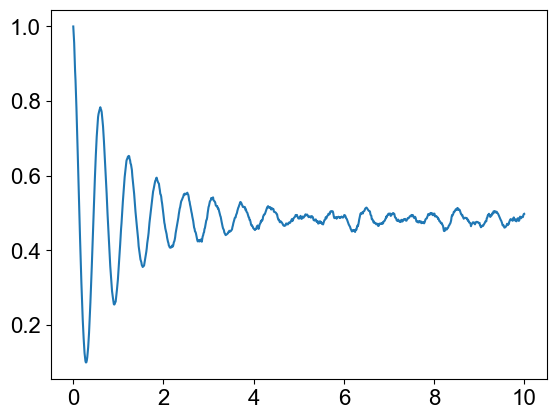

In [8]:
plt.plot(t, P)  # Still oscillates!

In [9]:
# Draft code:

cringe = np.array([0,1])
matrix_fun = np.array([[0,10],[10,0]])
# print(np.matmul(matrix_fun,cringe))

'''
# Simona's code:

# Simulation of MCW using a small time step.

test = psi_0  # Set initial state

y = []

for j in range(n + 1):
    
    test = np.matmul(H_tot, test)  # Evolve current state by time step dt
    mag_sq = abs(test[0] ** 2) + abs(test[1] ** 2)  # Calculate squared magnitude of new state
    r = random.random()
    
    if r > mag_sq:
        test = psi_0  # Qubit jumps to ground state
        # psi_evol[j] = [psi[0] ** 2, psi[1] ** 2]
    else:
        test = test / np.sqrt(mag)  # Renormalise qubit state and continue to evolve
        # psi_evol[j] = [psi[0] ** 2, psi[1] ** 2]
        
    y += [abs(test[1]) ** 2]
        
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population in excited state')
plt.show()
'''

"\n# Simona's code:\n\n# Simulation of MCW using a small time step.\n\ntest = psi_0  # Set initial state\n\ny = []\n\nfor j in range(n + 1):\n    \n    test = np.matmul(H_tot, test)  # Evolve current state by time step dt\n    mag_sq = abs(test[0] ** 2) + abs(test[1] ** 2)  # Calculate squared magnitude of new state\n    r = random.random()\n    \n    if r > mag_sq:\n        test = psi_0  # Qubit jumps to ground state\n        # psi_evol[j] = [psi[0] ** 2, psi[1] ** 2]\n    else:\n        test = test / np.sqrt(mag)  # Renormalise qubit state and continue to evolve\n        # psi_evol[j] = [psi[0] ** 2, psi[1] ** 2]\n        \n    y += [abs(test[1]) ** 2]\n        \nplt.plot(t, y)\nplt.xlabel('Time')\nplt.ylabel('Population in excited state')\nplt.show()\n"